# __Comparison Between Apple Stock and S&P500__

In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Download 1 year of data
data = yf.download('SPY AAPL', start='2023-05-01', end='2024-05-01')

# Calculates daily returns
daily_returns = data.pct_change().dropna()

# Calculates cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()

# Calculates annualized volatility
volatility = daily_returns.std() * (np.sqrt(252))

# Calculates Sharpe ratio assuming annual risk-free rate of 2%
rfr_daily = 0.02 / 252
sharpe_ratio = (daily_returns.mean() - rfr_daily) / daily_returns.std()

# Calculates the correlation
correlation = daily_returns.corr()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


<AxesSubplot:title={'center':'Cumulative Returns: AAPL vs SPY'}, xlabel='Date', ylabel='Growth of $1'>

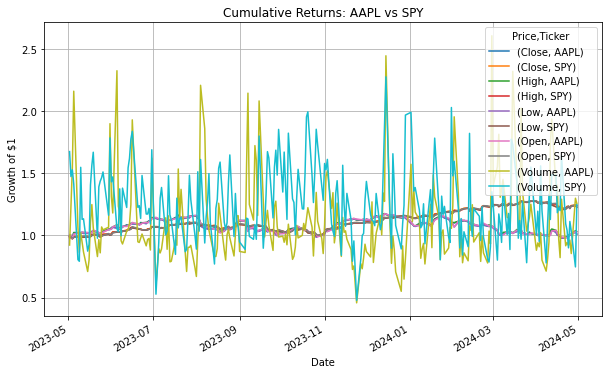

In [2]:
# Plot the returns
(cumulative_returns
 .plot(figsize=(10,6), 
       title='Cumulative Returns: AAPL vs SPY', 
       ylabel='Growth of $1',
       grid=True)
)
# Note: Growth of $1 means if you invest $1 initially, 
# What will it be worth over a time period

In [3]:
print("Annualized Volatility:\n", volatility)
print("\nSharpe Ratio:\n", sharpe_ratio)
print("\nCorrelation:\n", correlation)

Annualized Volatility:
 Price   Ticker
Close   AAPL      0.197232
        SPY       0.116498
High    AAPL      0.185394
        SPY       0.101784
Low     AAPL      0.192108
        SPY       0.107587
Open    AAPL      0.205917
        SPY       0.115633
Volume  AAPL      5.034780
        SPY       4.861808
dtype: float64

Sharpe Ratio:
 Price   Ticker
Close   AAPL      0.002912
        SPY       0.103323
High    AAPL      0.009810
        SPY       0.123439
Low     AAPL      0.003880
        SPY       0.111638
Open    AAPL      0.009269
        SPY       0.111223
Volume  AAPL      0.137173
        SPY       0.141653
dtype: float64

Correlation:
 Price             Close                High                 Low            \
Ticker             AAPL       SPY      AAPL       SPY      AAPL       SPY   
Price  Ticker                                                               
Close  AAPL    1.000000  0.607724  0.742788  0.403598  0.777866  0.382186   
       SPY     0.607724  1.000000  0.

<AxesSubplot:title={'center':'Cumulative Returns: AAPL vs SPY'}, xlabel='Date', ylabel='Growth of $1'>

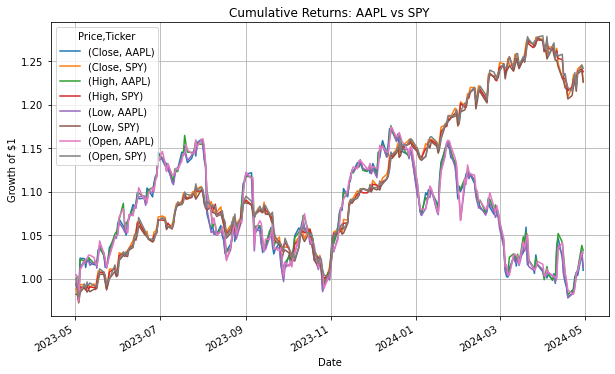

In [4]:
# Plots the data without the volume to see the values better
(cumulative_returns
 .iloc[:, :-2:]
 .plot(figsize=(10,6), 
       title='Cumulative Returns: AAPL vs SPY', 
       ylabel='Growth of $1',
       grid=True)
)

<AxesSubplot:title={'center':'Closing Cumulative Returns: AAPL vs SPY'}, xlabel='Date', ylabel='Growth of $1'>

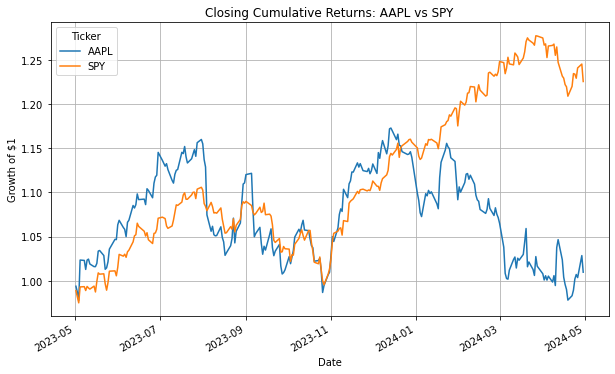

In [5]:
# Plots only the closing values for each asset
(cumulative_returns
 .iloc[:, :-2:]
 .Close
 .plot(figsize=(10,6), 
       title='Closing Cumulative Returns: AAPL vs SPY', 
       ylabel='Growth of $1',
       grid=True)
)

<AxesSubplot:xlabel='Date'>

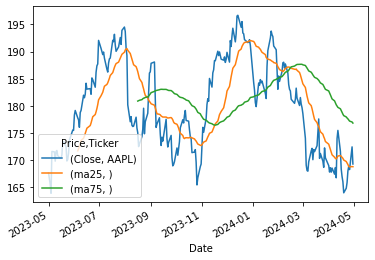

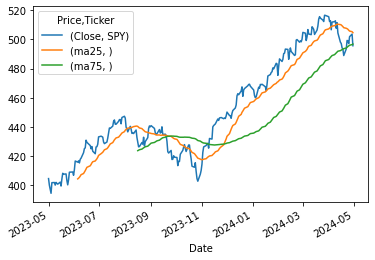

In [6]:
# Choose only the Apple columns
aapl = (data
       .iloc[:, ::2]
        )

# Choose only the S&P500 columns
spy = (data
       .iloc[:, 1::2]
        )

# Computes and plots moving averages for Apple
(aapl
 .assign(
         ma25=aapl.Close.rolling(25).mean(),
         ma75=aapl.Close.rolling(75).mean(),
         
        )
 [['Close', 'ma25', 'ma75']]
 .plot()
)

# Computes and plots moving averages for S&P500
(spy
 .assign(
         ma25=spy.Close.rolling(25).mean(),
         ma75=spy.Close.rolling(75).mean(),
         
        )
 [['Close', 'ma25', 'ma75']]
 .plot()
)

<AxesSubplot:xlabel='Date'>

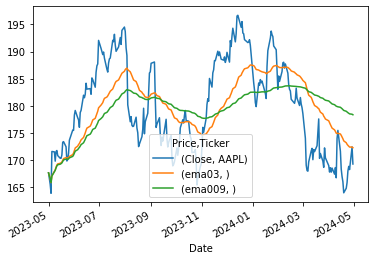

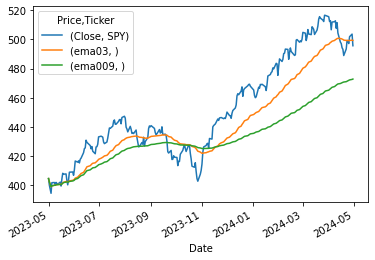

In [7]:
# Plots exponential moving averages for Apple
(aapl
 .assign(
         ema03=aapl.Close.ewm(alpha=0.0392).mean(),
         ema009=aapl.Close.ewm(alpha=0.00995).mean(),
         
        )
 [['Close', 'ema03', 'ema009']]
 .plot()
)

# Plots exponential moving averages for S&P500
(spy
 .assign(
         ema03=spy.Close.ewm(alpha=0.0392).mean(),
         ema009=spy.Close.ewm(alpha=0.00995).mean(),
         
        )
 [['Close', 'ema03', 'ema009']]
 .plot()
)

In [8]:
# Defines a function for max drawdown
def max_drawdown(cumulative):
    roll_max = cumulative.cummax()
    drawdown = (cumulative / roll_max) - 1.0
    return drawdown.min()

max_dd = cumulative_returns.apply(max_drawdown)
print("Max Drawdown:\n", max_dd)
# S&P500 clearly less risky than Apple since its Max Drawdown 
# Values are closer to zero

Max Drawdown:
 Price   Ticker
Close   AAPL     -0.166067
        SPY      -0.099743
High    AAPL     -0.165353
        SPY      -0.094414
Low     AAPL     -0.166044
        SPY      -0.099543
Open    AAPL     -0.163918
        SPY      -0.095859
Volume  AAPL     -0.802796
        SPY      -0.759884
dtype: float64


<AxesSubplot:title={'center':'21-Day Rolling Volatility'}, xlabel='Date'>

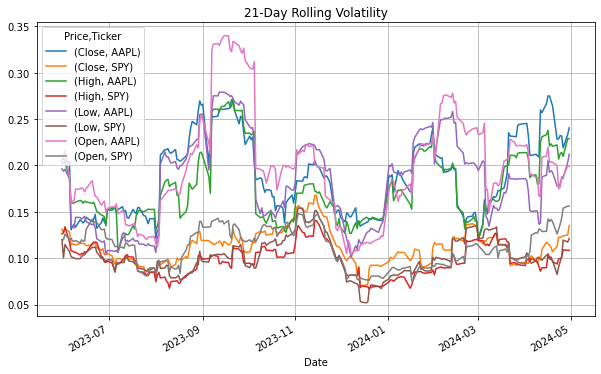

In [11]:
rolling_vol = daily_returns.rolling(21).std() * (np.sqrt(252))
(rolling_vol
 .iloc[:, :-2:]
 .plot(figsize=(10,6), 
       title='21-Day Rolling Volatility', 
       grid=True)
)

<AxesSubplot:title={'center':'Closing 21-Day Rolling Volatility'}, xlabel='Date'>

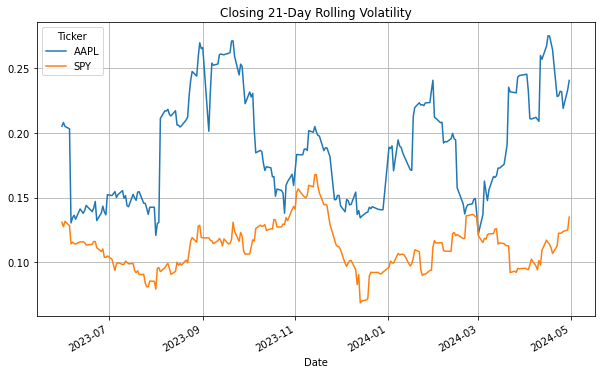

In [12]:
# Plots the rolling volatility of the Closing values for each asset
rolling_vol = daily_returns.rolling(21).std() * (np.sqrt(252))
(rolling_vol
 .iloc[:, :-2:]
 .Close
 .plot(figsize=(10,6), 
       title='Closing 21-Day Rolling Volatility', 
       grid=True)
)